In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
airline = pd.read_csv('airline-passengers.csv', index_col = 0, parse_dates = True)

In [8]:
airline.shape

(144, 1)

In [9]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of Passengers')

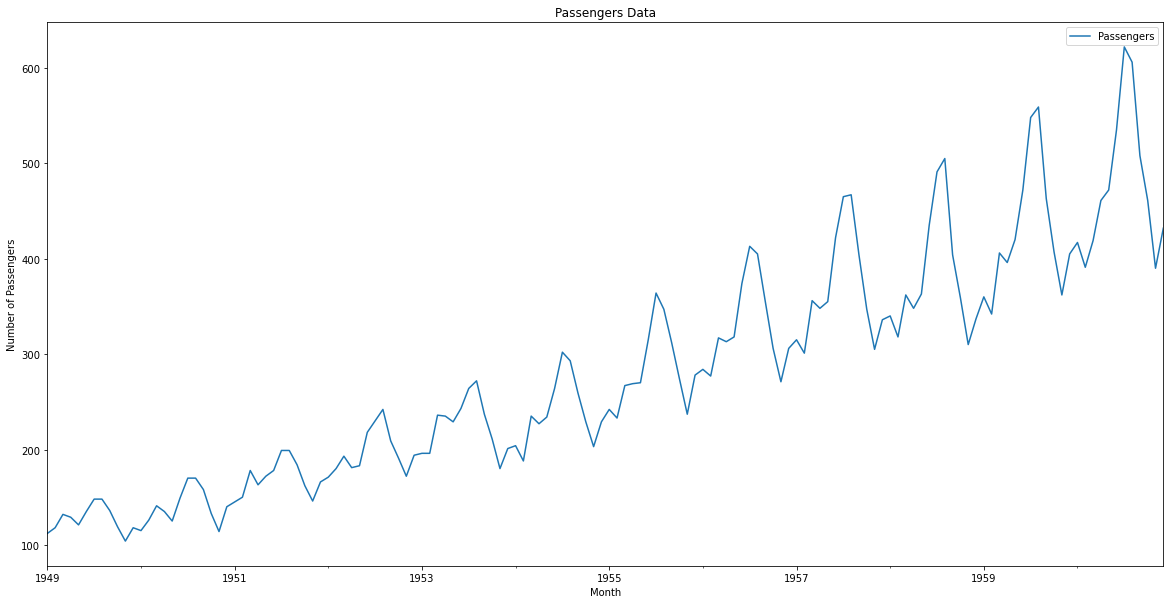

In [15]:
airline[['Passengers']].plot(title = "Passengers Data", figsize = (20,10))
plt.ylabel("Number of Passengers")

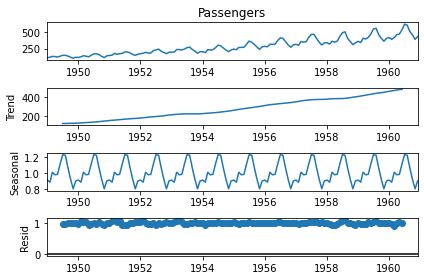

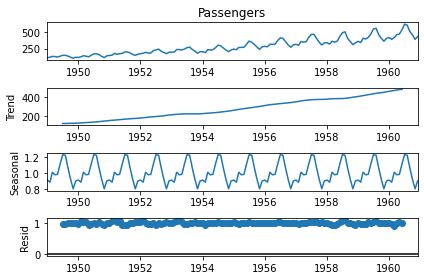

In [20]:
#know we want to decompose the time series and look for seasonality trends
decompose_result = seasonal_decompose(airline['Passengers'], model = 'multiplicative')
decompose_result.plot()

In [24]:
airline.index.freq = "MS"
m = 12
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winter Single Exponential Smoothing'}, xlabel='Month'>

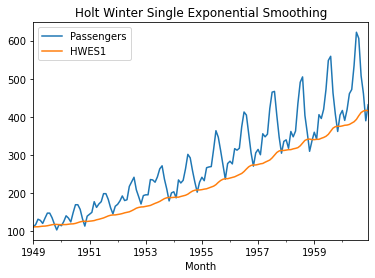

In [27]:
airline['HWES1'] = SimpleExpSmoothing(airline['Passengers']).fit(smoothing_level = alpha, optimized = False, use_brute = True).fittedvalues
airline[['Passengers', 'HWES1']].plot(title = 'Holt Winter Single Exponential Smoothing')

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

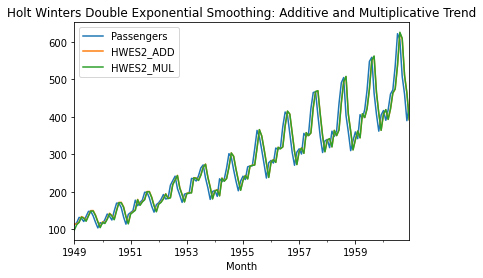

In [28]:
airline['HWES2_ADD'] = ExponentialSmoothing(airline['Passengers'], trend = 'add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['Passengers'], trend = 'mul').fit().fittedvalues
airline[['Passengers', 'HWES2_ADD', 'HWES2_MUL']].plot(title = "Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend")

<AxesSubplot:title={'center':'Holt-Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

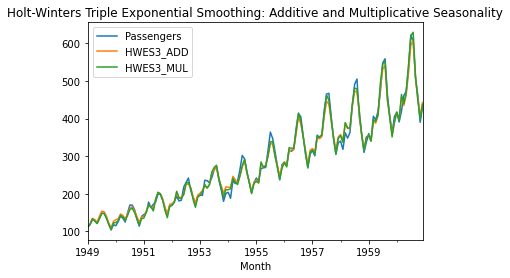

In [37]:
#using triple HWES
airline['HWES3_ADD'] = ExponentialSmoothing(airline['Passengers'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['Passengers'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit().fittedvalues
airline[['Passengers', 'HWES3_ADD', 'HWES3_MUL']].plot(title = 'Holt-Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [40]:
#now lets try to forecast the Holt-Winters exponential smoothing. We are trying to use 120 data points to predict the last 24 points

forecast_data = pd.read_csv("airline-passengers.csv", index_col = 0, parse_dates = True)
forecast_data.index.freq = 'MS'

train_airline = forecast_data[:120]
test_airline = forecast_data[120:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

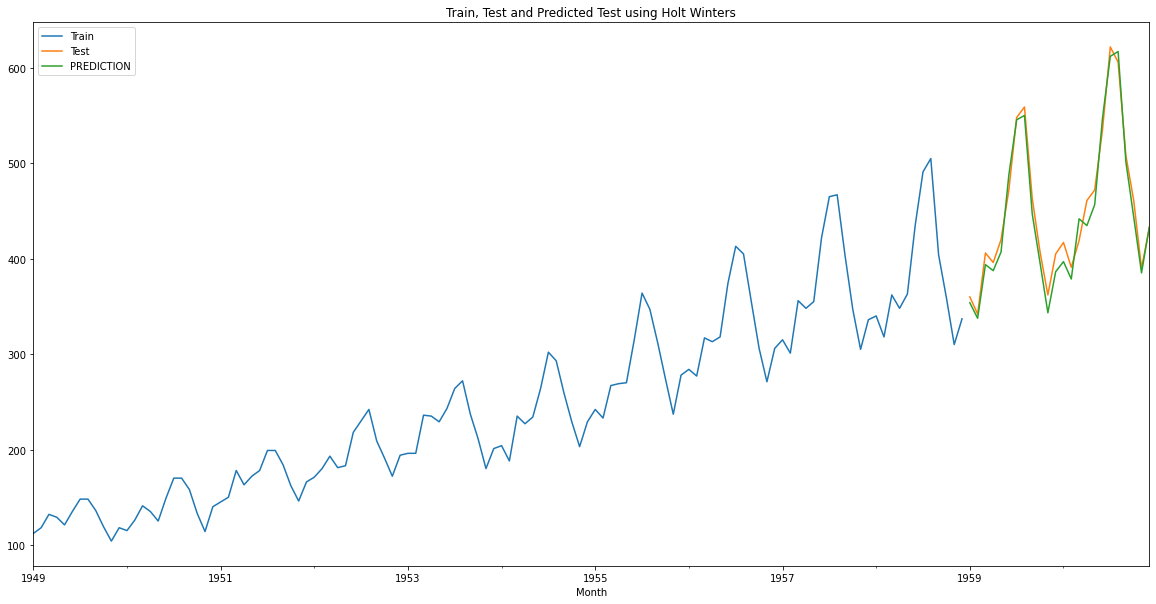

In [45]:
fitted_model = ExponentialSmoothing(train_airline['Passengers'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()
test_predictions = fitted_model.forecast(24)

train_airline['Passengers'].plot(legend = True, label = 'Train')
test_airline['Passengers'].plot(legend = True, label = 'Test', figsize = (20,10))
test_predictions.plot(legend = True, label = 'PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='Month'>

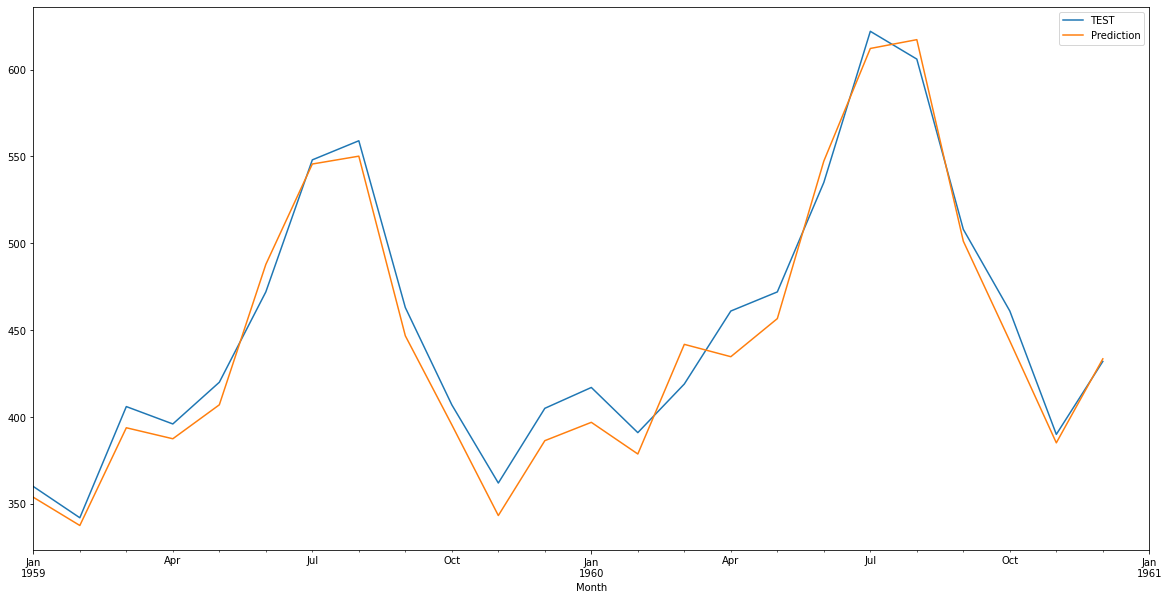

In [46]:
test_airline['Passengers'].plot(legend = True, label = 'TEST', figsize = (20,10))
test_predictions.plot(legend = True, label = 'Prediction', xlim = ['1959-01-01', '1961-01-01'])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_airline, test_predictions)}')
print(f'Mean Squared  Error = {mean_squared_error(test_airline, test_predictions)}')

Mean Absolute Error = 12.379391964591376
Mean Squared  Error = 192.57742277726808
